In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np

from config import Settings; settings = Settings()
from Mimic import Mimic
from ICDCodesGrouper import ICDCodesGrouper as Grouper

import matplotlib.pyplot as plt

# Parameters

In [2]:
patients_filename = 'eligible_patients_exc.nodiag_single.adm.txt'

In [3]:
patients_filepath = os.path.join(settings.data_base,settings.eligible_patients_folder, patients_filename)

patients = np.loadtxt(patients_filepath)

In [4]:
grouper = Grouper(settings)
mimic = Mimic(settings,grouper)

In [5]:
admissions = mimic.read_admissions()
data = admissions.loc[admissions.SUBJECT_ID.isin(patients)].groupby('SUBJECT_ID').HADM_ID.nunique().value_counts(normalize=True)

In [15]:
(mimic.read_diagnoses().groupby('SUBJECT_ID').HADM_ID.nunique() >= 2).sum()

7537

In [6]:
mimic.read_diagnoses()['icd9_level3'].nunique()

943

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of admissions per patient')

Text(0, 0.5, 'fraction')

Text(0.5, 0, 'Nº of Admissions')

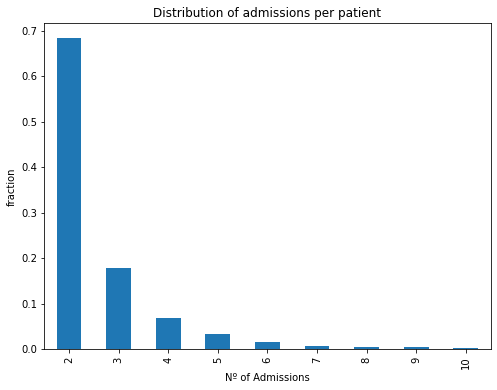

In [7]:
plt.figure(figsize=(8,6))
data.iloc[:9].plot.bar()
plt.title('Distribution of admissions per patient')
plt.ylabel('fraction')
plt.xlabel('Nº of Admissions')
plt.savefig('media/adm_dist.png')

<Figure size 864x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of Nº Diagnostics per admission')

Text(0, 0.5, 'fraction')

Text(0.5, 0, 'Nº diagnostics per admission')

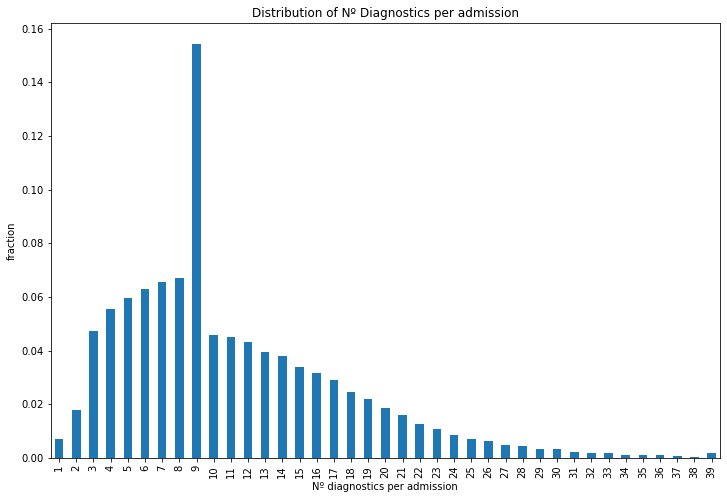

In [8]:
plt.figure(figsize=((12,8)))
mimic.read_diagnoses().groupby('HADM_ID').ICD9_CODE.size().value_counts(normalize=True).sort_index().plot.bar()
plt.title('Distribution of Nº Diagnostics per admission')
plt.ylabel('fraction')
plt.xlabel('Nº diagnostics per admission')
plt.savefig('media/diag_dist.png')

In [9]:
admissions.loc[admissions.SUBJECT_ID.isin(patients)].HADM_ID.nunique()

19917

In [10]:
admissions_eligible_list = (admissions
 .loc[admissions.SUBJECT_ID.isin(patients)]
 .HADM_ID.unique()
)

diagnoses = mimic.read_diagnoses()
diagnoses_eligible = diagnoses[diagnoses.HADM_ID.isin(admissions_eligible_list)]
diagnoses_eligible

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ccs,icd9chapters,icd9_level3
0,1297,109,172335,1.0,40301,99,7,403
111742,105616,9412,148755,1.0,99674,237,17,996
335323,328441,28882,166021,1.0,44100,115,7,441
274264,274442,24588,176009,1.0,42840,108,7,428
111727,105601,9412,114483,1.0,486,122,8,486
...,...,...,...,...,...,...,...,...
27313,37428,3369,126808,NaN,NaN,-1,NaN,nan
132492,128656,11438,154602,NaN,NaN,-1,NaN,nan
305335,278820,24975,109963,NaN,NaN,-1,NaN,nan
356738,367323,31928,153208,NaN,NaN,-1,NaN,nan


In [82]:
diagnoses_eligible.ICD9_CODE.nunique()

4880

In [81]:
diagnoses_eligible.groupby('ICD9_CODE').SUBJECT_ID.size().sort_values().where(lambda x: x>100).dropna()

ICD9_CODE
29570     101.0
99659     101.0
43330     101.0
6827      101.0
6961      101.0
          ...  
41401    4182.0
5849     4315.0
42731    5283.0
4280     6584.0
4019     7170.0
Name: SUBJECT_ID, Length: 458, dtype: float64

In [73]:
diagnoses.ICD9_CODE.nunique()

6984

<AxesSubplot:>

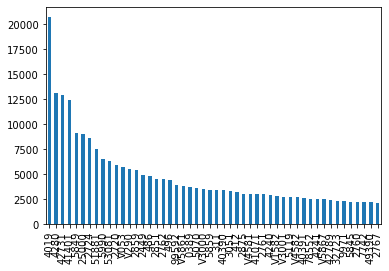

In [72]:
diagnoses.ICD9_CODE.value_counts().iloc[:50].plot.bar()

<AxesSubplot:>

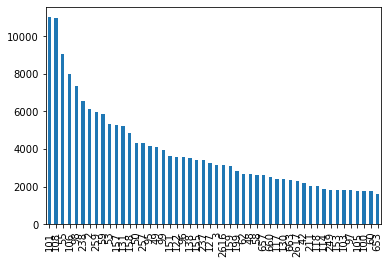

In [71]:
diagnoses_eligible.ccs.value_counts().iloc[:50].plot.bar()